<a href="https://colab.research.google.com/github/EricCallaway/COSC_6319_Project/blob/NavyaMakkena_COSC_6319_Project/model_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.6 MB 55.2 MB/s 
     |████████████████████████████████| 596 kB 47.5 MB/s 
     |████████████████████████████████| 77 kB 7.3 MB/s 
     |████████████████████████████████| 895 kB 56.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
!pip install datasets

     |████████████████████████████████| 325 kB 5.2 MB/s 
     |████████████████████████████████| 136 kB 77.2 MB/s 
     |████████████████████████████████| 1.1 MB 74.0 MB/s 
     |████████████████████████████████| 212 kB 78.8 MB/s 
     |████████████████████████████████| 127 kB 75.9 MB/s 
     |████████████████████████████████| 144 kB 78.9 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 271 kB 77.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Loading dataset from transformers datasets

In [3]:
from datasets import load_dataset

dataset = load_dataset("csebuetnlp/xlsum",'english')
train_report, train_summary, val_report, val_summary, test_report, test_summary = dataset['train']['text'][:100], dataset['train']['summary'][:100],dataset['validation']['text'][:100], dataset['validation']['summary'][:100],dataset['test']['text'], dataset['test']['summary']



Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/english/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Preprocessing data

In [4]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def text_lowercase(text):
    return text.lower()

def remove_numbers(text):
    output_text = re.sub(r'\d+', '', text)
    return output_text

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def remove_whitespace(text):
    return  text.strip()

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

def cleaning_data(content):
    # Lowercase text
    content = text_lowercase(content)

    # Remove numbers
    content = remove_numbers(content)

    # remove punctuation
    content = remove_punctuation(content)

    # remove whitespace from text
    content = remove_whitespace(content)

    # remove stopwords
    #content = remove_stopwords(content)
    return content

count = 0
for i in range(len(train_report)):
    train_report[i] = cleaning_data(train_report[i])
    count = count + len(train_report[i].split())
print(count)
count=0
for j in range(len(train_summary)):
    train_summary[j] = cleaning_data(train_summary[j])
    count = count + len(train_report[i].split())

print(count)
count=0
for k in range(len(val_report)):
    val_report[k] = cleaning_data(val_report[k])
    count = count + len(val_report[i].split())
print(count)
count=0
for l in range(len(val_summary)):
    val_summary[l] = cleaning_data(val_summary[l])
    count = count + len(val_summary[i].split())
print(count)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
69601
47700
69896
2300


Tokenise using kera's tokenizer

In [5]:
from keras.preprocessing.text import Tokenizer
VOCAB_SIZE = 50000
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
# articles
tokenizer.fit_on_texts(train_report)
article_sequences = tokenizer.texts_to_sequences(train_report)
art_word_index = tokenizer.word_index
print(len(art_word_index))
# summaries
tokenizer.fit_on_texts(train_summary)
summary_sequences = tokenizer.texts_to_sequences(train_summary)
summary_word_index = tokenizer.word_index
print(len(summary_word_index))
print(summary_sequences)

# validation articles
tokenizer.fit_on_texts(val_report)
validation_article_sequences = tokenizer.texts_to_sequences(val_report)
val_art_word_index = tokenizer.word_index
print(len(tokenizer.word_index))
# validation_summaries
tokenizer.fit_on_texts(val_summary)
validation_summary_sequences = tokenizer.texts_to_sequences(val_summary)
val_sum_word_index = tokenizer.word_index
print(len(tokenizer.word_index))




10023
10231
[[626, 74, 977, 10031, 586, 6, 996, 16, 10032, 995, 334, 2, 888, 1, 520, 3, 1, 106, 30, 241], [1, 1125, 10033, 10034, 10035, 22, 37, 2076, 6, 628, 3320, 3, 458, 19, 5, 169, 499, 6, 3289], [5, 170, 22, 37, 3270, 6, 2598, 10036, 327, 5, 10037, 1683, 6, 3388], [9, 13, 2130, 8, 1, 3454, 25, 1, 31, 3336, 8, 431, 1774, 303, 3506, 1004, 59, 10038, 80, 587, 287, 411, 10039, 80, 587, 287, 110, 156, 4, 30, 7, 226, 5, 1800, 5, 388, 333], [241, 214, 3, 304, 4768, 7, 887, 2, 118, 29, 2316], [5, 320, 170, 22, 37, 1144, 14, 158, 28, 1880, 731, 80, 3384, 1146, 2, 1, 45, 10040, 3239, 824, 2293, 10041], [2576, 1471, 38, 710, 21, 1023, 12, 1, 4105, 6, 1470], [5, 2507, 1474, 7, 2136, 12, 1, 171, 3, 279, 536, 2, 21, 1353, 47, 81, 766, 1724], [44, 1729, 17, 2, 160, 19, 1, 2578, 499, 6, 3222], [5, 2081, 6, 259, 1732, 1301, 10042, 1, 3230, 3, 3398, 1147, 7, 2, 21, 901, 23, 1, 266, 3, 10043], [1, 10044, 912, 85, 31, 115, 4434, 12, 1, 341, 3, 1, 602, 4, 3412, 20, 5, 10045, 6, 2587, 23, 5, 170, 41, 3

Padding using kera's pad_sequence to longest sequence length

In [6]:
from keras.preprocessing.sequence import pad_sequences
import numpy as np

pad_art_sequences = pad_sequences(article_sequences, maxlen=5000, padding='post', truncating='post')
pad_sum_sequences = pad_sequences(summary_sequences, maxlen=5000, padding='post', truncating='post')

pad_validation_art_sequences = pad_sequences(validation_article_sequences, maxlen=5000, padding='post', truncating='post')
pad_validation_sum_sequences = pad_sequences(validation_summary_sequences, maxlen=5000, padding='post', truncating='post')

print(pad_art_sequences)
print(pad_art_sequences.shape)
print(pad_sum_sequences.shape)
print(pad_validation_art_sequences.shape)
print(pad_validation_sum_sequences.shape)



[[   1  948  295 ...    0    0    0]
 [4758 3210 3211 ...    0    0    0]
 [ 256   39  244 ...    0    0    0]
 ...
 [9758 9759 1812 ...    0    0    0]
 [  23 4740 9816 ...    0    0    0]
 [  41  696    1 ...    0    0    0]]
(100, 5000)
(100, 5000)
(100, 5000)
(100, 5000)


Using Pre trained gloVe for word embeddings

In [7]:
import numpy as np

embeddings_index = {}
with open('/content/drive/My Drive/Colab Notebooks/glove.6B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 300
hits = 0
misses = 0

# Prepare embedding matrix for articles
article_embedding_matrix = np.zeros((len(val_art_word_index) + 1, embedding_dim))
for word, i in val_art_word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        article_embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
print(article_embedding_matrix.shape)

# Prepare embedding matrix for summaries
hits=0
misses = 0
summary_embedding_matrix = np.zeros((len(val_sum_word_index) + 1, embedding_dim))
for word, j in val_sum_word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        summary_embedding_matrix[j] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
print(summary_embedding_matrix.shape)

Found 400001 word vectors.
Converted 12205 words (1000 misses)
(13206, 300)
Converted 12280 words (1012 misses)
(13293, 300)


Loading embeddings matrix to embedding layer

In [8]:
from keras.layers import Embedding
import keras.initializers

max_len = pad_art_sequences.shape[1]
print(max_len)
encoder_embedding_layer = Embedding(
    input_dim = article_embedding_matrix.shape[0], #num_distinct_words
    output_dim = embedding_dim, #embedding_output_dims
    input_length = max_len, #max_sequence_length
    embeddings_initializer= keras.initializers.Constant(article_embedding_matrix),
    trainable = False
)

decoder_embedding_layer = Embedding(
    input_dim = summary_embedding_matrix.shape[0],
    output_dim = embedding_dim,
    input_length = pad_sum_sequences.shape[1],
    embeddings_initializer= keras.initializers.Constant(summary_embedding_matrix),
    trainable = False
)

5000


Build Model

In [9]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout,Input,Activation,Bidirectional

encoder_input = layers.Input(shape=(max_len))
encoder_embedded = encoder_embedding_layer(encoder_input)

# Decoder -- LSTM
decoder_input = layers.Input(shape=(pad_sum_sequences.shape[1],))
decoder_embedded = decoder_embedding_layer(decoder_input)

# Encoder 1 -- Bidirectional LSTM 1
encoder1_output, forward_h1, forward_c1 ,backward_h1, backward_c1= Bidirectional(layers.LSTM(300, return_state=True, return_sequences=True,name="encoder1"),merge_mode="concat")(
    encoder_embedded
)
# Encoder 2 -- Bidirectional LSTM 2
encode2_output, forward_h2, forward_c2 ,backward_h2, backward_c2= Bidirectional(layers.LSTM(300, return_state=True, return_sequences=True,name="encoder2"),merge_mode="concat")(
    encoder1_output,initial_state=[forward_h1,backward_h1,forward_c1,backward_c1]
)
state_h2 =  layers.Concatenate()([forward_h2, backward_h2])
state_c2 =  layers.Concatenate()([forward_c2, backward_c2])
encoder2_state = [state_h2,state_c2]

# Decoder -- LSTM
decoder_input = layers.Input(shape=(pad_sum_sequences.shape[1],))
decoder_embedded = decoder_embedding_layer(decoder_input)

# Pass the encoder 2 state to decoder LSTM layer, as initial state
decoder_output= layers.LSTM(600, name="decoder")(
    decoder_embedded, initial_state=encoder2_state
)
# Dense layer with sigmoid activation
output = layers.Dense(5000,activation='sigmoid')(decoder_output)

model = keras.Model([encoder_input, decoder_input], output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5000)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 5000, 300)    3961800     ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  [(None, 5000, 600),  1442400     ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300),                                                     
                                 (None, 300),                                                 

Compiling Model

In [10]:

model.compile(optimizer="adam", loss='mse', metrics=[keras.metrics.BinaryAccuracy()])

Training model

In [11]:
print(pad_art_sequences.shape)
print(pad_sum_sequences.shape)
print(pad_validation_art_sequences.shape)
print(pad_validation_sum_sequences.shape)

history = model.fit(  [pad_art_sequences,pad_sum_sequences], 
                      pad_sum_sequences.reshape(pad_sum_sequences.shape[0],pad_sum_sequences.shape[1], 1)  ,
                     epochs=5,
                     validation_data =([pad_validation_art_sequences,pad_validation_sum_sequences], pad_validation_sum_sequences.reshape(pad_validation_sum_sequences.shape[0],pad_validation_sum_sequences.shape[1], 1))
                     )
print(history.params)


(100, 5000)
(100, 5000)
(100, 5000)
(100, 5000)
Epoch 1/5
4/4 [==============================] - 235s 59s/step - loss: 51537.4102 - binary_accuracy: 0.9417 - val_loss: 44504.9883 - val_binary_accuracy: 0.5984
Epoch 2/5
4/4 [==============================] - 228s 58s/step - loss: 51533.1445 - binary_accuracy: 0.7763 - val_loss: 44501.2109 - val_binary_accuracy: 0.9752
Epoch 3/5
4/4 [==============================] - 210s 56s/step - loss: 51529.7734 - binary_accuracy: 0.9851 - val_loss: 44500.6484 - val_binary_accuracy: 0.9751
Epoch 4/5
4/4 [==============================] - 274s 70s/step - loss: 51529.3047 - binary_accuracy: 0.9850 - val_loss: 44500.6016 - val_binary_accuracy: 0.9751
Epoch 5/5
4/4 [==============================] - 202s 51s/step - loss: 51529.2500 - binary_accuracy: 0.9850 - val_loss: 44500.5938 - val_binary_accuracy: 0.9751
{'verbose': 1, 'epochs': 5, 'steps': 4}


Visualization of metrics

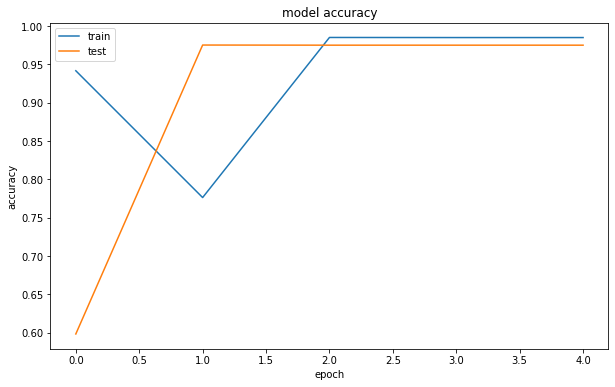

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()